In [1]:
from semantic_comms import calculate_psnr, train_semantic_communication_system, load_images, add_awgn_noise
import torch
import numpy as np
from semantic_models.sc1 import SemanticEncoder, SemanticDecoder
from semantic_models.sc2 import SemanticEncoder2, SemanticDecoder2
from semantic_models.tc import SemanticEncoderTC, SemanticDecoderTC
import matplotlib.pyplot as plt

In [26]:
np.random.seed(42)

# Images
images = load_images("output/masks")
num_images = images.size(0)
image_channels = images.size(1)
image_height = images.size(2)
image_width = images.size(3)

# Reshape images tensor to fit the semantic encoder input shape
images = images.view(num_images, image_channels, image_height, image_width)

# Set the desired SNR and number of training epochs
snr = 20  # dB
num_epochs = 1500

# Train the semantic communication system
encoder_model = SemanticEncoder()
decoder_model = SemanticDecoder()

# encoder_model = SemanticEncoder2()
# decoder_model = SemanticDecoder2()

# encoder_model = SemanticEncoderTC()
# decoder_model = SemanticDecoderTC()

In [ ]:
encoder, decoder = train_semantic_communication_system(encoder_model, decoder_model, images, snr, num_epochs)

In [57]:

snr = 20  # dB

# Calculate SNR
encoder_images = encoder(images)
noisy_images = add_awgn_noise(encoder_images, snr)
restored_images = decoder(noisy_images)
theta = 1.0

psnr = calculate_psnr(images, restored_images, restored_images, theta)


print(images.shape)
print(encoder_images.shape)
print(restored_images.shape)
print(f"PSNR over AWGN channel: {psnr.item()} dB")

torch.Size([5, 3, 32, 32])
torch.Size([5, 32, 8, 8])
torch.Size([5, 3, 32, 32])
PSNR over AWGN channel: 29.985151290893555 dB


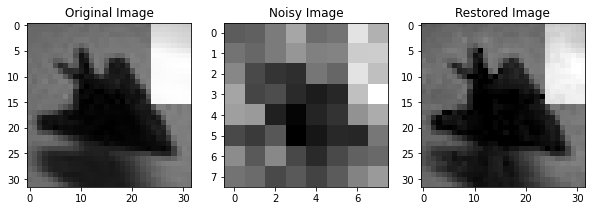

In [65]:
#plotting
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
im = images.detach().numpy()
im = np.sum(im, axis=0)
plt.imshow(im[0, :, :], cmap="gray")
plt.title("Original Image")
plt.subplot(1, 3, 2)
ns= noisy_images.detach().numpy()
ns = np.sum(ns, axis=0)
plt.imshow(ns[0, :, :], cmap="gray")
plt.title("Noisy Image")
plt.subplot(1, 3, 3)
rs= restored_images.detach().numpy()
#sum rs on axis 0 and 1
rs = np.sum(rs, axis=0)
plt.imshow(rs[0, :, :], cmap="gray")
plt.title("Restored Image")
plt.show()

In [75]:
def download_image(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as file:
        file.write(response.content)


In [110]:
from compressai.zoo import cheng2020_anchor

model = cheng2020_anchor(quality=6, pretrained=True).eval()

#download a sample image
import imageio
from skimage.transform import resize
from skimage import img_as_ubyte
from skimage.color import rgb2ycbcr, ycbcr2rgb
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import requests
#download a sample image
image = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg")
image = resize(image, (256, 256), anti_aliasing=True)

#convert to tensor
image = torch.from_numpy(image).permute(2, 0, 1).float().unsqueeze(0)

#compress and decompress
compressed_image = model.compress(image)

#decompress
reconstructed_image = model.decompress(compressed_image["strings"], compressed_image["shape"])

TypeError: square(): argument 'input' (position 1) must be Tensor, not list

In [107]:
recon = reconstructed_image['x_hat'].squeeze(0).permute(1, 2, 0).detach().numpy()
im  = image.squeeze(0).permute(1, 2, 0).detach().numpy()

In [108]:
psnr = psnr(im, recon)

In [109]:
print(f"PSNR: {psnr} dB")

PSNR: 38.35392643635525 dB
